In [2]:
import numpy as np
import pandas as pd
import gender_guesser.detector as gender

from functions.utils import *
#from functions.env_colors import *
from functions.location import *
from functions.menus import *
from functions.preprocessement import *
from functions.utils import *

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#pd.set_option('display.max_rows', None)

In [5]:
data = pd.read_csv('data/restaurants_data_preprocessed_bruno_12.11.2023.csv', index_col=0)

In [6]:
data

,address,averagePrice,chefName,cuisine,currency,customerPhotos/0,customerPhotos/1,customerPhotos/2,customerPhotos/3,customerPhotos/4,customerPhotos/5,customerPhotos/6,customerPhotos/7,customerPhotos/8,customerPhotos/9,customerPhotos/10,customerPhotos/11,customerPhotos/12,customerPhotos/13,customerPhotos/14,customerPhotos/15,customerPhotos/16,customerPhotos/17,customerPhotos/18,customerPhotos/19,description,hasLoyaltyProgram,isBookable,latitude,location,longitude,maxPartySize,name,offer,openingHours,paymentAccepted/0,paymentAccepted/1,paymentAccepted/2,paymentAccepted/3,paymentAccepted/4,paymentAccepted/5,paymentAccepted/6,paymentAccepted/7,paymentAccepted/8,phone,photo,photos/0,photos/1,photos/2,photos/3,photos/4,photos/5,photos/6,photos/7,photos/8,photos/9,photos/10,photos/11,photos/12,photos/13,photos/14,photos/15,photos/16,photos/17,photos/18,photos/19,photos/20,photos/21,photos/22,photos/23,photos/24,photos/25,photos/26,photos/27,photos/28,photos/29,photos/30,photos/31,photos/32,photos/33,photos/34,photos/35,photos/36,photos/37,photos/38,photos/39,photos/40,photos/41,photos/42,photos/43,photos/44,photos/45,photos/46,photos/47,photos/48,photos/49,photos/50,photos/51,photos/52,photos/53,photos/54,photos/55,photos/56,photos/57,photos/58,photos/59,photos/60,photos/61,photos/62,photos/63,photos/64,photos/65,photos/66,photos/67,photos/68,photos/69,photos/70,photos/71,photos/72,photos/73,photos/74,photos/75,photos/76,photos/77,photos/78,photos/79,photos/80,photos/81,photos/82,photos/83,photos/84,photos/85,photos/86,photos/87,photos/88,photos/89,photos/90,radius,ratingValue,reviewCount,reviewList/0/ambienceRatingValue,reviewList/0/date,reviewList/0/foodRatingValue,reviewList/0/ratingValue,reviewList/0/review,reviewList/0/reviewerName,reviewList/0/serviceRatingValue,reviewList/1/ambienceRatingValue,reviewList/1/date,reviewList/1/foodRatingValue,reviewList/1/ratingValue,reviewList/1/review,reviewList/1/reviewerName,reviewList/1/serviceRatingValue,reviewList/2/ambienceRatingValue,reviewList/2/date,reviewList/2/foodRatingValue,reviewList/2/ratingValue,reviewList/2/review,reviewList/2/reviewerName,reviewList/2/serviceRatingValue,reviewList/3/ambienceRatingValue,reviewList/3/date,reviewList/3/foodRatingValue,reviewList/3/ratingValue,reviewList/3/review,reviewList/3/reviewerName,reviewList/3/serviceRatingValue,reviewList/4/ambienceRatingValue,reviewList/4/date,reviewList/4/foodRatingValue,reviewList/4/ratingValue,reviewList/4/review,reviewList/4/reviewerName,reviewList/4/serviceRatingValue,reviewList/5/ambienceRatingValue,reviewList/5/date,reviewList/5/foodRatingValue,reviewList/5/ratingValue,reviewList/5/review,reviewList/5/reviewerName,reviewList/5/serviceRatingValue,reviewList/6/ambienceRatingValue,reviewList/6/date,reviewList/6/foodRatingValue,reviewList/6/ratingValue,reviewList/6/review,reviewList/6/reviewerName,reviewList/6/serviceRatingValue,reviewList/7/ambienceRatingValue,reviewList/7/date,reviewList/7/foodRatingValue,reviewList/7/ratingValue,reviewList/7/review,reviewList/7/reviewerName,reviewList/7/serviceRatingValue,reviewList/8/ambienceRatingValue,reviewList/8/date,reviewList/8/foodRatingValue,reviewList/8/ratingValue,reviewList/8/review,reviewList/8/reviewerName,reviewList/8/serviceRatingValue,reviewList/9/ambienceRatingValue,reviewList/9/date,reviewList/9/foodRatingValue,reviewList/9/ratingValue,reviewList/9/review,reviewList/9/reviewerName,reviewList/9/serviceRatingValue,reviewList/10/ambienceRatingValue,reviewList/10/date,reviewList/10/foodRatingValue,reviewList/10/ratingValue,reviewList/10/review,reviewList/10/reviewerName,reviewList/10/serviceRatingValue,reviewList/11/ambienceRatingValue,reviewList/11/date,reviewList/11/foodRatingValue,reviewList/11/ratingValue,reviewList/11/review,reviewList/11/reviewerName,reviewList/11/serviceRatingValue,reviewList/12/ambienceRatingValue,reviewList/12/date,reviewList/12/foodRatingValue,reviewList/12/ratingValue,reviewList/12/review,reviewList/12/reviewerName,reviewList/12/serviceRat

In [7]:
restaurant_reviews = data[['reviewList/0/ambienceRatingValue','reviewList/0/date', 'reviewList/0/foodRatingValue', 'reviewList/0/ratingValue', 'reviewList/0/review',
 'reviewList/0/reviewerName', 'reviewList/0/serviceRatingValue', 'reviewList/1/ambienceRatingValue', 'reviewList/1/date', 'reviewList/1/foodRatingValue', 'reviewList/1/ratingValue',
 'reviewList/1/review', 'reviewList/1/reviewerName', 'reviewList/1/serviceRatingValue', 'reviewList/2/ambienceRatingValue', 'reviewList/2/date', 'reviewList/2/foodRatingValue',
 'reviewList/2/ratingValue', 'reviewList/2/review', 'reviewList/2/reviewerName', 'reviewList/2/serviceRatingValue', 'reviewList/3/ambienceRatingValue','reviewList/3/date',
 'reviewList/3/foodRatingValue', 'reviewList/3/ratingValue', 'reviewList/3/review', 'reviewList/3/reviewerName', 'reviewList/3/serviceRatingValue', 'reviewList/4/ambienceRatingValue',
 'reviewList/4/date','reviewList/4/foodRatingValue', 'reviewList/4/ratingValue', 'reviewList/4/review', 'reviewList/4/reviewerName', 'reviewList/4/serviceRatingValue',
 'reviewList/5/ambienceRatingValue', 'reviewList/5/date', 'reviewList/5/foodRatingValue', 'reviewList/5/ratingValue', 'reviewList/5/review', 'reviewList/5/reviewerName',
 'reviewList/5/serviceRatingValue', 'reviewList/6/ambienceRatingValue', 'reviewList/6/date', 'reviewList/6/foodRatingValue', 'reviewList/6/ratingValue', 'reviewList/6/review',
 'reviewList/6/reviewerName', 'reviewList/6/serviceRatingValue', 'reviewList/7/ambienceRatingValue', 'reviewList/7/date', 'reviewList/7/foodRatingValue', 'reviewList/7/ratingValue',
 'reviewList/7/review', 'reviewList/7/reviewerName', 'reviewList/7/serviceRatingValue', 'reviewList/8/ambienceRatingValue', 'reviewList/8/date', 'reviewList/8/foodRatingValue',
 'reviewList/8/ratingValue', 'reviewList/8/review', 'reviewList/8/reviewerName', 'reviewList/8/serviceRatingValue', 'reviewList/9/ambienceRatingValue', 'reviewList/9/date',
 'reviewList/9/foodRatingValue', 'reviewList/9/ratingValue', 'reviewList/9/review', 'reviewList/9/reviewerName', 'reviewList/9/serviceRatingValue', 'reviewList/10/ambienceRatingValue',
 'reviewList/10/date', 'reviewList/10/foodRatingValue', 'reviewList/10/ratingValue', 'reviewList/10/review', 'reviewList/10/reviewerName', 'reviewList/10/serviceRatingValue',
 'reviewList/11/ambienceRatingValue', 'reviewList/11/date', 'reviewList/11/foodRatingValue', 'reviewList/11/ratingValue', 'reviewList/11/review', 'reviewList/11/reviewerName',
 'reviewList/11/serviceRatingValue', 'reviewList/12/ambienceRatingValue', 'reviewList/12/date', 'reviewList/12/foodRatingValue', 'reviewList/12/ratingValue', 'reviewList/12/review',
 'reviewList/12/reviewerName', 'reviewList/12/serviceRatingValue', 'reviewList/13/ambienceRatingValue', 'reviewList/13/date', 'reviewList/13/foodRatingValue', 'reviewList/13/ratingValue',
 'reviewList/13/review', 'reviewList/13/reviewerName', 'reviewList/13/serviceRatingValue', 'reviewList/14/ambienceRatingValue', 'reviewList/14/date',
 'reviewList/14/foodRatingValue', 'reviewList/14/ratingValue', 'reviewList/14/review', 'reviewList/14/reviewerName', 'reviewList/14/serviceRatingValue', 'reviewList/15/ambienceRatingValue',
 'reviewList/15/date', 'reviewList/15/foodRatingValue', 'reviewList/15/ratingValue', 'reviewList/15/review', 'reviewList/15/reviewerName', 'reviewList/15/serviceRatingValue',
 'reviewList/16/ambienceRatingValue', 'reviewList/16/date', 'reviewList/16/foodRatingValue', 'reviewList/16/ratingValue', 'reviewList/16/review', 'reviewList/16/reviewerName',
 'reviewList/16/serviceRatingValue', 'reviewList/17/ambienceRatingValue', 'reviewList/17/date', 'reviewList/17/foodRatingValue', 'reviewList/17/ratingValue', 'reviewList/17/review',
 'reviewList/17/reviewerName', 'reviewList/17/serviceRatingValue', 'reviewList/18/ambienceRatingValue', 'reviewList/18/date', 'reviewList/18/foodRatingValue', 'reviewList/18/ratingValue',
 'reviewList/18/review', 'reviewList/18/reviewerName', 'reviewList/18/serviceRatingValue', 'reviewList/19/ambienceRatingValue', 'reviewList/19/date', 'reviewList/19/foodRatingValue',
 'reviewList/19/ratingValue', 'reviewList/19/review', 'reviewList/19/reviewerName', 'reviewList/19/serviceRatingValue']].copy()

In [8]:
restaurant_reviews

,reviewList/0/ambienceRatingValue,reviewList/0/date,reviewList/0/foodRatingValue,reviewList/0/ratingValue,reviewList/0/review,reviewList/0/reviewerName,reviewList/0/serviceRatingValue,reviewList/1/ambienceRatingValue,reviewList/1/date,reviewList/1/foodRatingValue,reviewList/1/ratingValue,reviewList/1/review,reviewList/1/reviewerName,reviewList/1/serviceRatingValue,reviewList/2/ambienceRatingValue,reviewList/2/date,reviewList/2/foodRatingValue,reviewList/2/ratingValue,reviewList/2/review,reviewList/2/reviewerName,reviewList/2/serviceRatingValue,reviewList/3/ambienceRatingValue,reviewList/3/date,reviewList/3/foodRatingValue,reviewList/3/ratingValue,reviewList/3/review,reviewList/3/reviewerName,reviewList/3/serviceRatingValue,reviewList/4/ambienceRatingValue,reviewList/4/date,reviewList/4/foodRatingValue,reviewList/4/ratingValue,reviewList/4/review,reviewList/4/reviewerName,reviewList/4/serviceRatingValue,reviewList/5/ambienceRatingValue,reviewList/5/date,reviewList/5/foodRatingValue,reviewList/5/ratingValue,reviewList/5/review,reviewList/5/reviewerName,reviewList/5/serviceRatingValue,reviewList/6/ambienceRatingValue,reviewList/6/date,reviewList/6/foodRatingValue,reviewList/6/ratingValue,reviewList/6/review,reviewList/6/reviewerName,reviewList/6/serviceRatingValue,reviewList/7/ambienceRatingValue,reviewList/7/date,reviewList/7/foodRatingValue,reviewList/7/ratingValue,reviewList/7/review,reviewList/7/reviewerName,reviewList/7/serviceRatingValue,reviewList/8/ambienceRatingValue,reviewList/8/date,reviewList/8/foodRatingValue,reviewList/8/ratingValue,reviewList/8/review,reviewList/8/reviewerName,reviewList/8/serviceRatingValue,reviewList/9/ambienceRatingValue,reviewList/9/date,reviewList/9/foodRatingValue,reviewList/9/ratingValue,reviewList/9/review,reviewList/9/reviewerName,reviewList/9/serviceRatingValue,reviewList/10/ambienceRatingValue,reviewList/10/date,reviewList/10/foodRatingValue,reviewList/10/ratingValue,reviewList/10/review,reviewList/10/reviewerName,reviewList/10/serviceRatingValue,reviewList/11/ambienceRatingValue,reviewList/11/date,reviewList/11/foodRatingValue,reviewList/11/ratingValue,reviewList/11/review,reviewList/11/reviewerName,reviewList/11/serviceRatingValue,reviewList/12/ambienceRatingValue,reviewList/12/date,reviewList/12/foodRatingValue,reviewList/12/ratingValue,reviewList/12/review,reviewList/12/reviewerName,reviewList/12/serviceRatingValue,reviewList/13/ambienceRatingValue,reviewList/13/date,reviewList/13/foodRatingValue,reviewList/13/ratingValue,reviewList/13/review,reviewList/13/reviewerName,reviewList/13/serviceRatingValue,reviewList/14/ambienceRatingValue,reviewList/14/date,reviewList/14/foodRatingValue,reviewList/14/ratingValue,reviewList/14/review,reviewList/14/reviewerName,reviewList/14/serviceRatingValue,reviewList/15/ambienceRatingValue,reviewList/15/date,reviewList/15/foodRatingValue,reviewList/15/ratingValue,reviewList/15/review,reviewList/15/reviewerName,reviewList/15/serviceRatingValue,reviewList/16/ambienceRatingValue,reviewList/16/date,reviewList/16/foodRatingValue,reviewList/16/ratingValue,reviewList/16/review,reviewList/16/reviewerName,reviewList/16/serviceRatingValue,reviewList/17/ambienceRatingValue,reviewList/17/date,reviewList/17/foodRatingValue,reviewList/17/ratingValue,reviewList/17/review,reviewList/17/reviewerName,reviewList/17/serviceRatingValue,reviewList/18/ambienceRatingValue,reviewList/18/date,reviewList/18/foodRatingValue,reviewList/18/ratingValue,reviewList/18/review,reviewList/18/reviewerName,reviewList/18/serviceRatingValue,reviewList/19/ambienceRatingValue,reviewList/19/date,reviewList/19/foodRatingValue,reviewList/19/ratingValue,reviewList/19/review,reviewList/19/reviewerName,reviewList/19/serviceRatingValue
restaurantID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
730060,10.0,2023-08-08T19:30:00.000Z,10.0,10.0,"Espaço agradável, simpatia e interacção por pa...",Rui Jorge M.,10.0

In [9]:
# Create an empty list to store rows of the new DataFrame
restaurant_reviews_new = []

# Iterate through each row of the original DataFrame
for index, row in data.iterrows():
    restaurantID = index
    
    # Iterate through the 20 review instances
    for i in range(20):
        review_data = {
            'restaurantID': restaurantID,
            'reviewNumber': i,
            'reviewList/date': row[f'reviewList/{i}/date'],
            'reviewList/reviewerName': row[f'reviewList/{i}/reviewerName'],
            'reviewList/ambienceRatingValue': row[f'reviewList/{i}/ambienceRatingValue'],
            'reviewList/foodRatingValue': row[f'reviewList/{i}/foodRatingValue'],
            'reviewList/serviceRatingValue': row[f'reviewList/{i}/serviceRatingValue'],
            'reviewList/ratingValue': row[f'reviewList/{i}/ratingValue'],
            'reviewList/review': row[f'reviewList/{i}/review']
        }
        restaurant_reviews_new.append(review_data)

# Create the new DataFrame
restaurant_reviews_new = pd.DataFrame(restaurant_reviews_new)

# Ensure the 'reviewNumber' column is of integer data type
restaurant_reviews_new['reviewNumber'] = restaurant_reviews_new['reviewNumber'].astype(int)

In [10]:
restaurant_reviews_new.head()

,restaurantID,reviewNumber,reviewList/date,reviewList/reviewerName,reviewList/ambienceRatingValue,reviewList/foodRatingValue,reviewList/serviceRatingValue,reviewList/ratingValue,reviewList/review
0,730060,0,2023-08-08T19:30:00.000Z,Rui Jorge M.,10.0,10.0,10.0,10.0,"Espaço agradável, simpatia e interacção por pa..."
1,730060,1,2022-06-05T20:00:00.000Z,Jim S.,10.0,10.0,10.0,10.0,Our waitress Ana was fantastic. She served our...
2,730060,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,730060,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,730060,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Drop rows with null values in the 'reviewList/reviewerName' column
restaurant_reviews_new = restaurant_reviews_new.dropna(subset=['reviewList/reviewerName'])

# Reset the index after dropping rows
restaurant_reviews_new = restaurant_reviews_new.reset_index(drop=True)

In [12]:
restaurant_reviews_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22766 entries, 0 to 22765
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   restaurantID                    22766 non-null  int64  
 1   reviewNumber                    22766 non-null  int32  
 2   reviewList/date                 22766 non-null  object 
 3   reviewList/reviewerName         22766 non-null  object 
 4   reviewList/ambienceRatingValue  22766 non-null  float64
 5   reviewList/foodRatingValue      22766 non-null  float64
 6   reviewList/serviceRatingValue   22766 non-null  float64
 7   reviewList/ratingValue          22766 non-null  float64
 8   reviewList/review               22764 non-null  object 
dtypes: float64(4), int32(1), int64(1), object(3)
memory usage: 1.5+ MB


In [13]:
# Filter the DataFrame to exclude rows with 'reviewList/reviewerName' equal to '- -'
restaurant_reviews_new_filtered = restaurant_reviews_new[restaurant_reviews_new['reviewList/reviewerName'] != '- -']

# Reset the index after filtering
restaurant_reviews_new_filtered = restaurant_reviews_new_filtered.reset_index(drop=True)

In [14]:
restaurant_reviews_new_filtered

,restaurantID,reviewNumber,reviewList/date,reviewList/reviewerName,reviewList/ambienceRatingValue,reviewList/foodRatingValue,reviewList/serviceRatingValue,reviewList/ratingValue,reviewList/review
0,730060,0,2023-08-08T19:30:00.000Z,Rui Jorge M.,10.0,10.0,10.0,10.0,"Espaço agradável, simpatia e interacção por pa..."
1,730060,1,2022-06-05T20:00:00.000Z,Jim S.,10.0,10.0,10.0,10.0,Our waitress Ana was fantastic. She served our...
2,805058,0,2023-09-23T20:30:00.000Z,Lara P.,8.0,2.0,2.0,3.5,ninguém gostou
3,805058,1,2023-09-21T19:30:00.000Z,James W.,6.0,6.0,8.0,6.5,"The restaurant was absolutely fine, but the re..."
4,805058,2,2023-09-21T19:00:00.000Z,James S.,10.0,10.0,10.0,10.0,We were here two nights in a row - meat porti...
...,...,...,...,...,...,...,...,...,...
22650,612699,17,2023-07-03T18:30:00.000Z,Helena s.,10.0,10.0,10.0,10.0,É sempre bom voltar ao Me.at. \r\nAdoramos a s...
22651,612699,18,2023-06-24T19:30:00.000Z,Cláudia S.,8.0,10.0,10.0,9.5,"Espaço muito bem decorado, ambiente agradável,..."
22652,612699,19,2023-06-12T18:00:00.000Z,Pedro C.,8.0,8.0,8.0,8.0,"Muito agradável, embora ainda calmo, pois foi ..."
22653,802161,0,2023-08-06T18:30:00.000Z,Rodrigo A.,10.0,10.0,10.0,10.0,Comida muito boa e funcionários muito simpátic...


In [15]:
restaurant_reviews_new_filtered['reviewList/reviewerName'].nunique()

11704

In [16]:
# Group the original DataFrame by 'reviewList/reviewerName'
grouped = restaurant_reviews_new_filtered.groupby('reviewList/reviewerName')
d = gender.Detector()

# Initialize lists to store data for the new DataFrame
reviewer_names = []
num_reviews = []
visited_restaurants = []
avg_rating = []
avg_food_rating = []
avg_service_rating = []
avg_ambience_rating = []
review_texts = []
unique_restaurants_visited = []
genders = []

# Iterate through each reviewer group and calculate the required statistics
for reviewer_name, group in grouped:
    reviewer_names.append(reviewer_name)
    num_reviews.append(len(group))
    visited_restaurants.append(group['restaurantID'].tolist())
    avg_rating.append(group['reviewList/ratingValue'].mean())
    avg_food_rating.append(group['reviewList/foodRatingValue'].mean())
    avg_service_rating.append(group['reviewList/serviceRatingValue'].mean())
    avg_ambience_rating.append(group['reviewList/ambienceRatingValue'].mean())
    review_texts.append(group['reviewList/review'].tolist())
    unique_restaurants_visited.append(len(set(group['restaurantID'])))

    gender_prediction = d.get_gender(reviewer_name.split()[0].lower().capitalize())
    if gender_prediction == 'mostly_female':
        gender_prediction = 'female'
    elif gender_prediction == 'mostly_male':
        gender_prediction = 'male'
    genders.append(gender_prediction)

# Create the new DataFrame
reviewer_data = {
    'reviewerName': reviewer_names,
    'reviewerGender': genders,
    'numberReviews': num_reviews,
    'numberRestaurantsVisited': unique_restaurants_visited,
    'restaurants': visited_restaurants,
    'personalRating': avg_rating,
    'personalFoodRating': avg_food_rating,
    'personalServiceRating': avg_service_rating,
    'personalAmbienceRating': avg_ambience_rating,
    'reviews': review_texts
}
clients = pd.DataFrame(reviewer_data)

In [17]:
clients = clients[clients['reviewerGender'] != 'andy']

In [18]:
clients['reviewerGender'].value_counts()

reviewerGender
female     5646
male       4644
unknown    1320
Name: count, dtype: int64

In [19]:
# Create an empty list to store the calculated average prices
average_prices = []

# Iterate through each row in your dataset
for row in clients.itertuples(index=False):
    # Get the list of restaurant IDs visited by the individual
    restaurant_ids = row.restaurants

    # Initialize variables to calculate the average price and count the restaurants
    total_price = 0
    num_restaurants = 0

    # Calculate the total price for the visited restaurants
    for restaurant_id in restaurant_ids:
        # Access the 'averagePrice' for the restaurant from the 'data' table
        average_price = data.loc[restaurant_id, 'averagePrice']

        # Check if the average price is available
        if not pd.isna(average_price):
            total_price += average_price
            num_restaurants += 1

    # Calculate the average price for this individual
    if num_restaurants > 0:
        average_price = total_price / num_restaurants
    else:
        # Handle the case where no average prices were available
        average_price = None

    average_prices.append(average_price)

# Add the calculated average prices as a new column in your dataset
clients['averageMoneySpent'] = average_prices

In [20]:
# Create an empty list to store the calculated average reviewCount
average_review_count = []

# Iterate through each row in your dataset
for row in clients.itertuples(index=False):
    # Get the list of restaurant IDs visited by the individual
    restaurant_ids = row.restaurants

    # Initialize variables to calculate the average reviewCount
    total_review_count = 0
    num_restaurants = 0

    # Calculate the total reviewCount for the visited restaurants
    for restaurant_id in restaurant_ids:
        # Access the 'reviewCount' for the restaurant from the 'data' table
        review_count = data.loc[restaurant_id, 'reviewCount']

        # Check if the reviewCount is available
        if not pd.isna(review_count):
            total_review_count += review_count
            num_restaurants += 1

    # Calculate the average reviewCount for this individual
    if num_restaurants > 0:
        average_review_count_value = total_review_count / num_restaurants
    else:
        average_review_count_value = None

    average_review_count.append(average_review_count_value)

# Add the calculated average reviewCount as a new column in your dataset
clients['averageReviewCount'] = average_review_count

In [21]:
visited_cuisines = []  # New list for visited cuisines
visited_styles = []  # New list for visited styles

# Iterate through each row in your dataset
for row in clients.itertuples(index=False):
    # Get the list of restaurant IDs, cuisines, and styles visited by the individual
    restaurant_ids = row.restaurants

    # Initialize lists to collect all visited cuisines and styles
    cuisines = []
    styles = []

    # Collect all visited cuisines and styles
    for restaurant_id in restaurant_ids:
        # Access the 'cuisine' and 'style' for the restaurant from the 'data' table
        cuisine = data.loc[restaurant_id, 'cuisine']
        style = data.loc[restaurant_id, 'style']

        # Check if the cuisine and style are available
        if not pd.isna(cuisine):
            cuisines.append(cuisine)
        if not pd.isna(style):
            styles.append(style)

    visited_cuisines.append(cuisines)
    visited_styles.append(styles)

# Add the 'visitedCuisines' and 'visitedStyles' columns to your dataset
clients['visitedCuisines'] = visited_cuisines
clients['visitedStyles'] = visited_styles

In [22]:
# Initialize a list to store the restaurant locations for each individual
visited_locations = []

# Iterate through each row in your 'clients' DataFrame
for row in clients.itertuples(index=False):
    # Get the list of restaurant IDs visited by the individual
    restaurant_ids = row.restaurants
    
    # Initialize a list to store the locations for this individual
    locations = []

    # Collect the latitude and longitude for each visited restaurant
    for restaurant_id in restaurant_ids:
        # Access the 'latitude' and 'longitude' for the restaurant from the 'data' table
        latitude = data.loc[restaurant_id, 'latitude']
        longitude = data.loc[restaurant_id, 'longitude']

        # Check if latitude and longitude are available
        if not pd.isna(latitude) and not pd.isna(longitude):
            locations.append([latitude, longitude])

    visited_locations.append(locations)

# Add the list of visited locations as a new column in your 'clients' DataFrame
clients['visitedLocations'] = visited_locations

In [23]:
# Assuming 'visitedLocations' contains lists of latitude and longitude
clients['midpoint'] = clients['visitedLocations'].apply(lambda locations: [np.mean([location[0] for location in locations]), np.mean([location[1] for location in locations])])

# The 'midpoint' column will now contain the midpoint coordinates as [latitude, longitude]

In [24]:
import re
import unicodedata

# Define a function to standardize text
def standardize_text(text):
    if isinstance(text, str):
        # Remove numbers
        text_no_numbers = re.sub(r'\d', '', text)

        # Remove non-ASCII characters and convert to lowercase
        text_cleaned = unicodedata.normalize('NFKD', text_no_numbers).encode('ASCII', 'ignore').decode('utf-8').lower()

        return text_cleaned
    else:
        # Return an empty string if the input is not a string
        return ''

# Apply the 'standardize_text' function to each element in the 'reviews' column
clients['reviews'] = clients['reviews'].apply(lambda x: [standardize_text(review) for review in x])

In [25]:
from langdetect import detect

# Define a function to detect the language of a single text
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Not Available"

# Concatenate all the review texts within each list
clients['reviewLanguage'] = clients['reviews'].apply(lambda x: ' '.join(x))

# Apply the language detection function only if the text has 30 or more characters
clients['reviewLanguage'] = clients['reviewLanguage'].apply(lambda x: detect_language(x) if len(x) >= 30 else 'Not Available')

In [26]:
clients.head()

,reviewerName,reviewerGender,numberReviews,numberRestaurantsVisited,restaurants,personalRating,personalFoodRating,personalServiceRating,personalAmbienceRating,reviews,averageMoneySpent,averageReviewCount,visitedCuisines,visitedStyles,visitedLocations,midpoint,reviewLanguage
0,- P.,unknown,3,2,"[201820, 201820, 387511]",8.0,8.666667,7.333333,7.333333,[we used to invite our friends to this restaur...,60.0,967.666667,"[International, International, Portuguese]","[Fine Dining, Fine Dining, Family]","[[37.09791786, -8.02514232], [37.09791786, -8....","[37.106696006666674, -8.190832980000001]",en
1,A c.,unknown,1,1,[528521],5.0,2.000000,10.000000,6.000000,[viande pas fraiche \r\nservice ok],14.0,642.000000,[Portuguese],[Homemade],"[[38.8613708, -9.3750662]]","[38.8613708, -9.3750662]",en
2,A. Ana Rita C.,unknown,1,1,[664311],8.5,8.000000,10.000000,8.000000,"[comida saborosa, tradicional, mas com toque m...",25.0,121.000000,[Portuguese],[Not Available],"[[38.7166426, -9.1454985]]","[38.7166426, -9.1454985]",pt
3,A. C.,unknown,1,1,[316753],6.0,4.000000,6.000000,10.000000,[espaco acolhedor e informal. batata doce as r...,15.0,513.000000,[Portuguese],[Fine Dining],"[[40.2035531, -8.4045613]]","[40.2035531, -8.4045613]",pt
4,A.C. V.,unknown,1,1,[730838],10.0,10.000000,10.000000,10.000000,"[muito agradavel, excelente servico e proprie...",20.0,92.000000,[Portuguese],[Family],"[[40.29549408, -7.6703968]]","[40.29549408, -7.6703968]",pt


In [27]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11610 entries, 0 to 11703
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   reviewerName              11610 non-null  object 
 1   reviewerGender            11610 non-null  object 
 2   numberReviews             11610 non-null  int64  
 3   numberRestaurantsVisited  11610 non-null  int64  
 4   restaurants               11610 non-null  object 
 5   personalRating            11610 non-null  float64
 6   personalFoodRating        11610 non-null  float64
 7   personalServiceRating     11610 non-null  float64
 8   personalAmbienceRating    11610 non-null  float64
 9   reviews                   11610 non-null  object 
 10  averageMoneySpent         11610 non-null  float64
 11  averageReviewCount        11610 non-null  float64
 12  visitedCuisines           11610 non-null  object 
 13  visitedStyles             11610 non-null  object 
 14  visitedLoca

In [28]:
clients.head()

,reviewerName,reviewerGender,numberReviews,numberRestaurantsVisited,restaurants,personalRating,personalFoodRating,personalServiceRating,personalAmbienceRating,reviews,averageMoneySpent,averageReviewCount,visitedCuisines,visitedStyles,visitedLocations,midpoint,reviewLanguage
0,- P.,unknown,3,2,"[201820, 201820, 387511]",8.0,8.666667,7.333333,7.333333,[we used to invite our friends to this restaur...,60.0,967.666667,"[International, International, Portuguese]","[Fine Dining, Fine Dining, Family]","[[37.09791786, -8.02514232], [37.09791786, -8....","[37.106696006666674, -8.190832980000001]",en
1,A c.,unknown,1,1,[528521],5.0,2.000000,10.000000,6.000000,[viande pas fraiche \r\nservice ok],14.0,642.000000,[Portuguese],[Homemade],"[[38.8613708, -9.3750662]]","[38.8613708, -9.3750662]",en
2,A. Ana Rita C.,unknown,1,1,[664311],8.5,8.000000,10.000000,8.000000,"[comida saborosa, tradicional, mas com toque m...",25.0,121.000000,[Portuguese],[Not Available],"[[38.7166426, -9.1454985]]","[38.7166426, -9.1454985]",pt
3,A. C.,unknown,1,1,[316753],6.0,4.000000,6.000000,10.000000,[espaco acolhedor e informal. batata doce as r...,15.0,513.000000,[Portuguese],[Fine Dining],"[[40.2035531, -8.4045613]]","[40.2035531, -8.4045613]",pt
4,A.C. V.,unknown,1,1,[730838],10.0,10.000000,10.000000,10.000000,"[muito agradavel, excelente servico e proprie...",20.0,92.000000,[Portuguese],[Family],"[[40.29549408, -7.6703968]]","[40.29549408, -7.6703968]",pt


In [29]:
#LATITUDES E LONGITUDES ESTRANHAS!
#data[data['longitude']==-99.50084726]

In [30]:
#import folium

# Create a map centered at a specific location
#map_center = [latitude, longitude]  # Replace with the desired center coordinates
#my_map = folium.Map(location=map_center, zoom_start=10)

# Iterate through locations and add markers to the map
#for location in clients['visitedLocations']:
#    for lat, lon in location:
#        folium.Marker([lat, lon]).add_to(my_map)

# Save the map as an HTML file
#my_map.save('my_map.html')

In [31]:
clients

,reviewerName,reviewerGender,numberReviews,numberRestaurantsVisited,restaurants,personalRating,personalFoodRating,personalServiceRating,personalAmbienceRating,reviews,averageMoneySpent,averageReviewCount,visitedCuisines,visitedStyles,visitedLocations,midpoint,reviewLanguage
0,- P.,unknown,3,2,"[201820, 201820, 387511]",8.0,8.666667,7.333333,7.333333,[we used to invite our friends to this restaur...,60.0,967.666667,"[International, International, Portuguese]","[Fine Dining, Fine Dining, Family]","[[37.09791786, -8.02514232], [37.09791786, -8....","[37.106696006666674, -8.190832980000001]",en
1,A c.,unknown,1,1,[528521],5.0,2.000000,10.000000,6.000000,[viande pas fraiche \r\nservice ok],14.0,642.000000,[Portuguese],[Homemade],"[[38.8613708, -9.3750662]]","[38.8613708, -9.3750662]",en
2,A. Ana Rita C.,unknown,1,1,[664311],8.5,8.000000,10.000000,8.000000,"[comida saborosa, tradicional, mas com toque m...",25.0,121.000000,[Portuguese],[Not Available],"[[38.7166426, -9.1454985]]","[38.7166426, -9.1454985]",pt
3,A. C.,unknown,1,1,[316753],6.0,4.000000,6.000000,10.000000,[espaco acolhedor e informal. batata doce as r...,15.0,513.000000,[Portuguese],[Fine Dining],"[[40.2035531, -8.4045613]]","[40.2035531, -8.4045613]",pt
4,A.C. V.,unknown,1,1,[730838],10.0,10.000000,10.000000,10.000000,"[muito agradavel, excelente servico e proprie...",20.0,92.000000,[Portuguese],[Family],"[[40.29549408, -7.6703968]]","[40.29549408, -7.6703968]",pt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11699,Светлана О.,unknown,1,1,[750413],10.0,10.000000,10.000000,10.000000,"[it was amazing! food, service, atmosphere ???...",34.0,160.000000,[Japanese],[Not Available],"[[41.1481899, -8.6135333]]","[41.1481899, -8.6135333]",en
11700,אורי מ.,unknown,1,1,[590849],10.0,10.000000,10.000000,10.000000,[special experience! the concept is special an...,55.0,152.000000,[European],[Chill Out],"[[41.26236297, -7.57985487]]","[41.26236297, -7.57985487]",en
11701,恩瑀 曹,unknown,1,1,[748877],10.0,10.000000,10.000000,10.000000,[the food were amazing! it's a great place to ...,14.0,460.000000,[International],[Chill Out],"[[38.7105382, -9.1362318]]","[38.7105382, -9.1362318]",en
11702,김 수빈,unknown,1,1,[748296],10.0,10.000000,10.000000,10.000000,[the best restaurant in faro. as an asian pers...,21.0,133.000000,[International],[Chill Out],"[[37.0148408, -7.9322771]]","[37.0148408, -7.9322771]",en


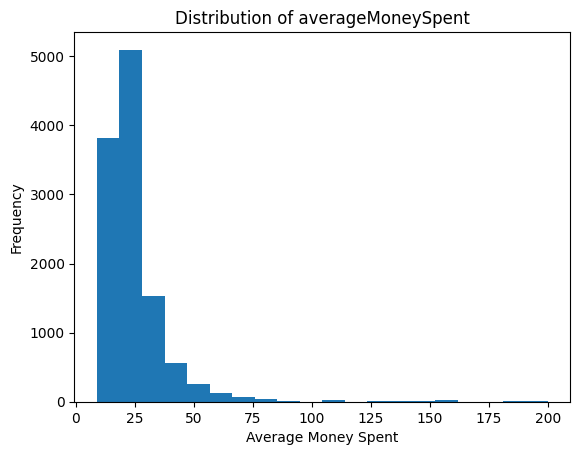

In [32]:
import matplotlib.pyplot as plt

# Plotting a histogram
plt.hist(clients['averageMoneySpent'], bins=20)
plt.title('Distribution of averageMoneySpent')
plt.xlabel('Average Money Spent')
plt.ylabel('Frequency')
plt.show()

In [42]:
# Create a new variable 'age' based on a hypothetical relationship
clients['age'] = (20 + 0.5 * clients['averageMoneySpent'] + np.random.normal(-5, 5, len(clients))).astype(int)

In [43]:
clients.loc[clients['age'] > 90, 'age'] = clients['age'].mean()
clients.loc[clients['age'] < 18, 'age'] = np.random.uniform(18, 24, len(clients[clients['age'] < 18]))

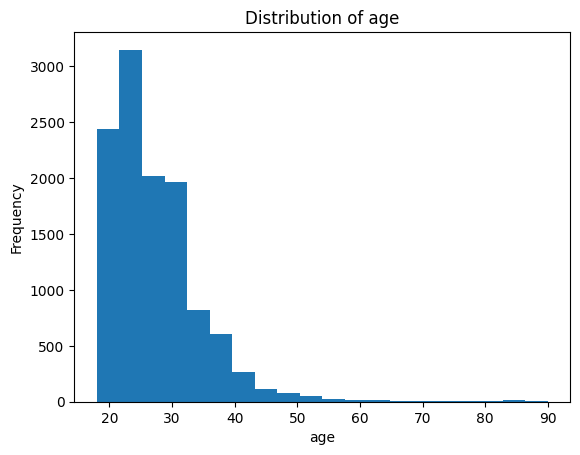

In [44]:
# Plotting a histogram
plt.hist(clients['age'], bins=20)
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

In [45]:
clients['age'].min()

18.0

In [46]:
clients['age'].max()

90.0

In [47]:
# https://www.statista.com/statistics/937317/tobacco-smoking-prevalence-globally-by-age/
distributions = [0.142, 0.217, 0.263, 0.285, 0.268, 0.227, 0.18, 0.127]


def assign_smoker(age):
    if 15 <= age <= 24:
        return np.random.choice([0, 1], p=[1 - distributions[0], distributions[0]])
    elif 25 <= age <= 34:
        return np.random.choice([0, 1], p=[1 - distributions[1], distributions[1]])
    elif 35 <= age <= 44:
        return np.random.choice([0, 1], p=[1 - distributions[2], distributions[2]])
    elif 45 <= age <= 54:
        return np.random.choice([0, 1], p=[1 - distributions[3], distributions[3]])
    elif 55 <= age <= 64:
        return np.random.choice([0, 1], p=[1 - distributions[4], distributions[4]])
    elif 65 <= age <= 74:
        return np.random.choice([0, 1], p=[1 - distributions[5], distributions[5]])
    elif 75 <= age <= 84:
        return np.random.choice([0, 1], p=[1 - distributions[6], distributions[6]])
    elif age >= 85:
        return np.random.choice([0, 1], p=[1 - distributions[7], distributions[7]])
    else:
        return np.nan  # Handle cases where age is outside specified ranges

# Apply the function to create the "smoker" variable
clients['smoker'] = clients['age'].apply(assign_smoker)